# Exercise 02

# 03: Data Preparation

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.datasets import load_digits

In [36]:
def create_digitdata(X, target, digit1, digit2, newlabel1, newlabel2, change_label=False):
    """
    Returns dataset where the targets only correspond to digit1 or digit2,
    furthermore the labels of the two classes can be changed to newlabels
    """

    bool_1 = (target == digit1)
    bool_2 = (target == digit2)
    bool_1_2 = bool_1 + bool_2
    indices_1_2 = np.where(bool_1_2 == True)[0]
    X_new = X[indices_1_2, :]

    target_new = target[indices_1_2]

    if change_label:
        indices = np.where(target_new == digit1)[0]
        target_new[indices] = newlabel1
        indices = np.where(target_new == digit2)[0]
        target_new[indices] = newlabel2


    return(X_new, target_new)

In [53]:
digits = load_digits ()
print ( digits.keys () )
data = digits ["data"]
images = digits ["images"]
target = digits ["target"]
target_names = digits ["target_names"]

print("data.shape:", data.shape)
print('images.shape:', images.shape)
print('target[0:10]:', target[0:10])

# only working with digits 1 and 7
X, y = create_digitdata(digits.data, digits.target, 1, 7, newlabel1=0, newlabel2=1, change_label=True)

# splitting training and test data
X_train, X_test, y_train, y_test =\
model_selection.train_test_split(X, y, test_size=0.4, random_state=0)

assert 361 == len(X_train_new1)+len(X_test_new1) # checks if data set is right size

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
data.shape: (1797, 64)
images.shape: (1797, 8, 8)
target[0:10]: [0 1 2 3 4 5 6 7 8 9]


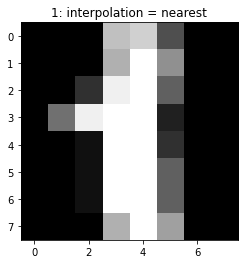

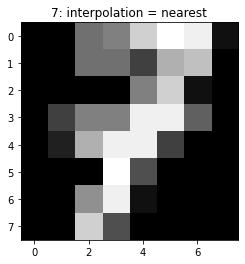

In [54]:
"""
Finding out, which pixels might be good
"""
img = images[1]
img2 = images[7]
assert 2 == len(img.shape)

# plotting image of a three
plt.figure(0)
plt.gray()
plt.title('1: interpolation = nearest')
plt.imshow(img, interpolation='nearest')
plt.show()

plt.figure(1)
plt.gray()
plt.title('7: interpolation = nearest')
plt.imshow(img2, interpolation='nearest')
plt.show()

# Exercise 3.1
We want to implement functions $\tilde{f}_1, \tilde{f}_2$ that reduce 64 features to two. In order to find this, we look at squares which are different for typical images of 7 and 1. We recognize $f_{06}, f_{60}, f_{29}$ and $f_{52}$. With 4 fields, we can choose two functions.
$$ \tilde{f}_1 = \frac{f_{06}}{2}-f_{60},$$
$$\tilde{f}_2 = f_{29}-f_{52}. $$

In [55]:
def reduce_dim(X_input):
  """
  Reduce dimensionality from 64 to 2
  """
  f_1 = X_input[:,6]/2 - X_input[:, 60]
  f_2 = X_input[:,29] + X_input[:, 52] 

  X_reduced = np.stack((f_1, f_2), axis=1)
  
  return(X_reduced)


Testing if the function works correctly:

In [58]:
print(np.shape(X_train_new1))
X_reduced = reduce_dim(X_train_new1)
print(np.shape(X_reduced))

(223, 64)
(223, 2)


Reducing dimensionality of data for the following tasks:

In [51]:
X_train_new = reduce_dim(X_train_new1)
X_test_new = reduce_dim(X_test_new1)

## Exercise 3.2: Scatterplot


In [52]:
ones = X_train_new[y_train_new==0]
sevens = X_train_new[y_train_new==1]
dist_vec = -(X_train_new-np.mean(ones))
random = np.linalg.norm(dist_vec, axis=0)
print(np.mean(ones, axis=0), "\n", np.mean(sevens, axis=0), "\n",dist_vec.shape, "\n", random)

[-12.6559633   19.86238532] 
 [ 0.52192982 18.18421053] 
 (223, 2) 
 [179.96170415 252.67057878]


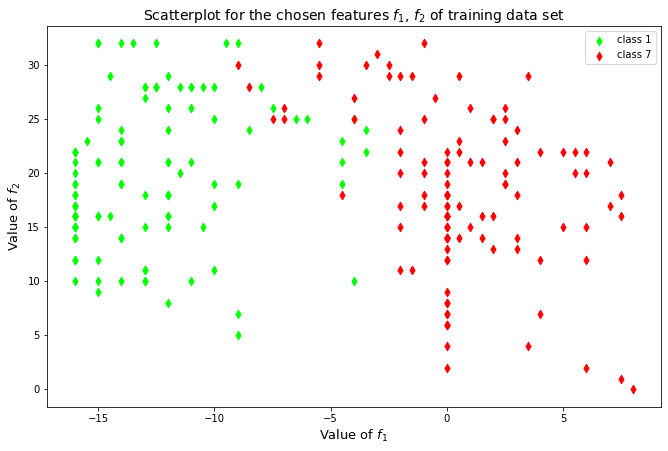

In [ ]:
plt.figure(figsize=(11,7))
plt.scatter(ones[:,0], ones[:,1], marker="d", color="lime", label="class 1")
plt.scatter(sevens[:,0], sevens[:,1], marker="d", color="red", label="class 7")
plt.title("Scatterplot for the chosen features ${f}_1$, ${f}_2$ of training data set", fontsize="14")
plt.xlabel("Value of $f_1$", fontsize="13")
plt.ylabel("Value of $f_2$", fontsize="13")
plt.legend()
plt.show()

Small overlap, although it's scattering pretty hard. Should be "good enough". 

# Exercise 4.1

In [ ]:
def nearest_mean(training_features, training_labels, test_features):
  """
  A function to implement a nearest mean classifier
  """
  #c0 stands for class 0 etc.
  means_c0 = np.mean(training_features[training_labels==0], axis=0)
  means_c1 = np.mean(training_features[training_labels==1], axis=0)

  d_0 = -(test_features-means_c0) #distance vector to mean of 1
  d_1 = -(test_features-means_c1) #distance vector to mean of 7
  test_labels = np.zeros(len(test_features))

  for i in range(len(test_features)):
    if (np.linalg.norm(d_0[i])<np.linalg.norm(d_1[i])):
      continue
    else: test_labels[i] = 1
  return test_labels

def error_rate(classified, sample, size): 
  """
  Function to compare two np.arrays and get a error rate
  """
  diff=0
  for i in range(size):
    if((classified[i]==sample[i])==False):
      diff+=1
  error = diff/size
  return error

In [ ]:
predicted_labels = nearest_mean(X_train_new, y_train_new, X_test_new)
assert len(y_test_new) == len(predicted_labels) #sanity check
rate = error_rate(y_test_new,predicted_labels, len(predicted_labels))

print("The error rate for this data set is: ", rate*100, "%")

The error rate for this data set is:  9.420289855072465 %


# Exercise 5.1

In [ ]:
def calc_covmat(train_feat_k, N_k, mu_k):
    """
    Calculates in class covariance matrix with given mu_k of class k
    """
    D = np.shape(train_feat_k)[1]
    vector = train_feat_k - mu_k
    covmat = np.zeros((D, D))
    for i in range(N_k):
        vector_temp = vector[i][:, np.newaxis]
        covmat += vector_temp @ vector_temp.T

    return(covmat)


def fit_qda(training_features, training_labels):
    """
    Returns mu, covarinace matrices and the two priors
    """

    N = len(training_labels)
    indices_1 = np.where(y_train_new == 0)[0]
    indices_7 = np.where(y_train_new == 1)[0]
    N_1 = len(indices_1)
    N_7 = len(indices_7)
    train_feat_1 = training_features[indices_1, :]
    train_feat_7 = training_features[indices_7, :]
    # calculating mean
    mu_1 = np.mean(train_feat_1, axis=0)
    mu_7 = np.mean(train_feat_7, axis=0)
    mu = np.stack((mu_1, mu_7), axis=0)

    # calculating covariance matrix
    cov_1 = calc_covmat(train_feat_1, N_1, mu_1)
    cov_7 = calc_covmat(train_feat_7, N_7, mu_7)
    covmat = np.stack((cov_1, cov_7), axis=0)

    # calculating priors
    p = np.zeros(2)
    p[0] = len(indices_1) / N
    p[1] = len(indices_7) / N

    return(mu, covmat, p)

Run QDA Training and checking correct ouptput dimensionalities:

In [ ]:
mu, covmat, p = fit_qda(X_train_new, y_train_new)
print(np.shape(mu))
print(np.shape(covmat))
print(np.shape(p))

(2, 2)
(2, 2, 2)
(2,)


# Exercise 5.2

In [ ]:
def predict_qda(mu, covmat, p, test_features):
    """
    Calculates QDA predictions by minimizing the mahalanobis distance
    """

    M = np.shape(test_features)[0]
    # calculating inverse of covmatrices
    covmat_1 = covmat[0, :, :]
    covmat_7 = covmat[1, :, :]
    covmat_1_inv = np.linalg.inv(covmat_1)
    covmat_7_inv = np.linalg.inv(covmat_7)
    # calculating b_k coefficients
    b_1 = 0.5 * np.log(np.linalg.det(2 * np.pi * covmat_1)) - np.log(p[0])
    b_7 = 0.5 * np.log(np.linalg.det(2 * np.pi * covmat_7)) - np.log(p[1])
    # array holding predictions
    predict = np.zeros(M)
    # defining vectors used in the mahalanobis distance calculation
    vector_1 = test_features - mu[0]
    vector_7 = test_features - mu[1]

    for m in range(M):
        vector_temp_1 = vector_1[m][:, np.newaxis]
        vector_temp_7 = vector_7[m][:, np.newaxis]
        distance_1 = 0.5 * (vector_temp_1.T @ covmat_1_inv @ vector_temp_1) + b_1
        distance_7 = 0.5 * (vector_temp_7.T @ covmat_7_inv @ vector_temp_7) + b_7
        if distance_1 < distance_7:
            predict[m] = 0
        else:
            predict[m] = 1

    return(predict)

Run QDA prediction:

In [ ]:
predict_train = predict_qda(mu, covmat, p, X_train_new)

Calculating errors:

In [ ]:
error_train = np.sum(np.abs(predict_train - y_train_new)) / len(y_train_new)
print('training error:', error_train)

predict_test = predict_qda(mu, covmat, p, X_test_new)
error_test = np.sum(np.abs(predict_test - y_test_new)) / len(y_test_new)
print('test error:', error_test)

training error: 0.2062780269058296
test error: 0.17391304347826086


##Exercise 5.4

In [ ]:
# cross validation loop:
test_err = np.zeros(10)
train_err = np.zeros(10)

for i in range(10):

    X_train, X_test, y_train, y_test =\
    model_selection.train_test_split(X, y, test_size=0.1, shuffle=True)

    # run QDA training
    mu, covmat, p = fit_qda(X_train, y_train)

    # run QDA prediction
    predict_train = predict_qda(mu, covmat, p, X_train)
    predict_test = predict_qda(mu, covmat, p, X_test)

    # calculating errors
    error_train = np.sum(np.abs(predict_train - y_train)) / len(y_train)
    error_test = np.sum(np.abs(predict_test - y_test)) / len(y_test)

    test_err[i] = error_test
    train_err[i] = error_train

print('mean test error:', np.mean(test_err))
print('mean train error:', np.mean(train_err))